<a href="https://colab.research.google.com/github/jagriti0207/-ml-rainfall-prediction/blob/main/ml_project_rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#STEP 1: Data Cleaning
import pandas as pd

# Load dataset
df = pd.read_csv('/content/weatherAUS.csv.zip')
print("Shape before cleaning:", df.shape)

# Drop columns with excessive missing values
df = df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)

# Drop rows with missing values in remaining columns
df = df.dropna()

print("Shape after dropping nulls:", df.shape)


Shape before cleaning: (145460, 23)
Shape after dropping nulls: (112925, 19)


In [ ]:
# STEP 2: Data Preprocessing & Encodi
# Encode binary categorical variables
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True)

print("Columns after encoding:", df.columns.tolist())


Columns after encoding: ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Ulur

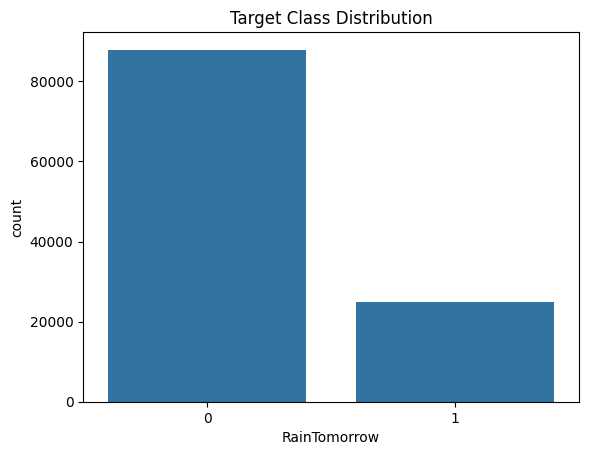

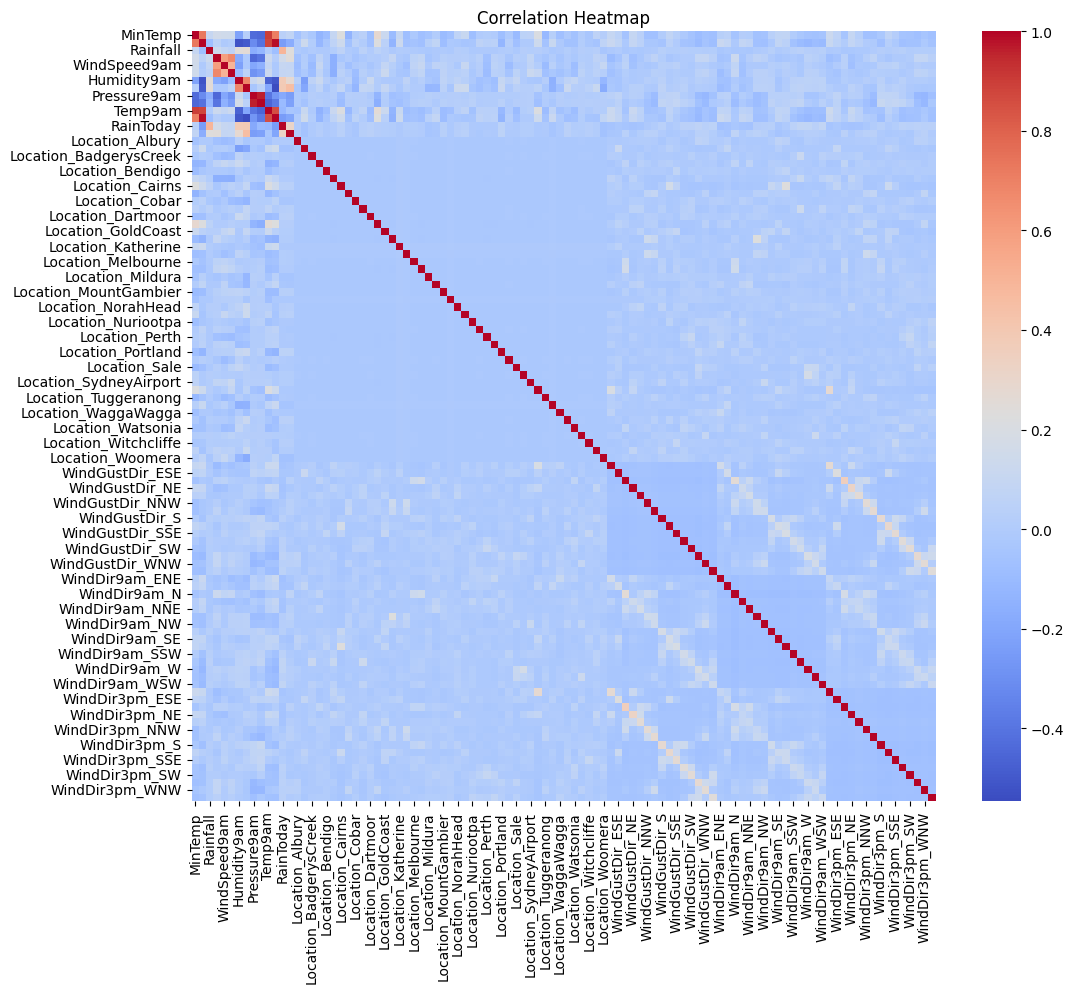

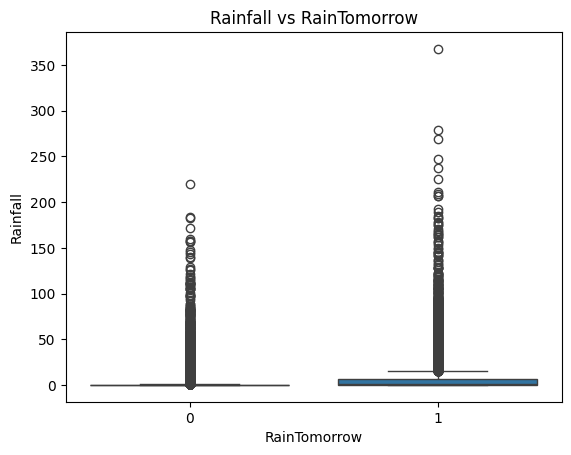

In [ ]:
#📊 STEP 3: Exploratory Data Analysis (EDA)

import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
sns.countplot(x='RainTomorrow', data=df)
plt.title("Target Class Distribution")
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Rainfall vs RainTomorrow
sns.boxplot(x='RainTomorrow', y='Rainfall', data=df)
plt.title("Rainfall vs RainTomorrow")
plt.show()



In [ ]:
#STEP 4: Feature Engineering & Selection
# Separate features and target
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# (Optional) Feature scaling - not necessary for Random Forest, but useful if trying other models
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


In [ ]:
#STEP 5: Model Selection & Training

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = df.drop(['RainTomorrow', 'Date'], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#STEP 6: Model Evaluation & Optimization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8557892406464468

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     17524
           1       0.78      0.50      0.61      5061

    accuracy                           0.86     22585
   macro avg       0.82      0.73      0.76     22585
weighted avg       0.85      0.86      0.84     22585


Confusion Matrix:
 [[16801   723]
 [ 2534  2527]]


In [ ]:
 #Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Best Score: 0.8569736407099912


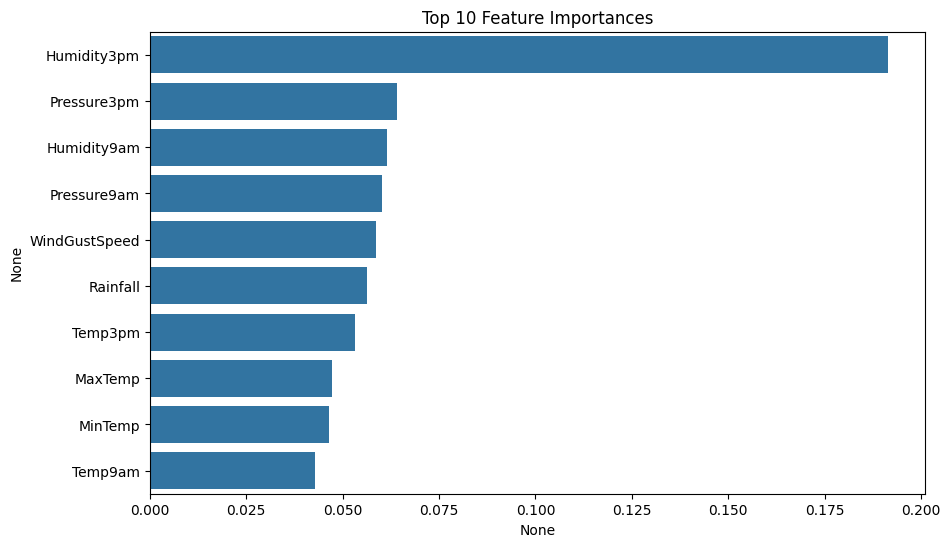

In [ ]:
# step7:Prediction & Interpretation
# Final prediction using best model (optional)
final_model = grid.best_estimator_
y_pred_final = final_model.predict(X_test)

# Interpretation: Feature Importance
feature_names = X_train.columns


importances = pd.Series(final_model.feature_importances_, index=X_train.columns)
top_importances = importances.nlargest(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_importances, y=top_importances.index)
plt.title("Top 10 Feature Importances")
plt.show()


In [ ]:
#Save Model
import joblib

joblib.dump(final_model, "rainfall_prediction_rf.pkl")
print("Model saved successfully!")


Model saved successfully!
